# Anticipez les besoins en consommation de bâtiments


# ETAPE 1: 
Analyse exploratoire et 1er data ingennirig

# 1) Import des packagings 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
import sweetviz

# META DATA 

# 2) Importer le fichier  

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

# 3) Analyse exploratoire et nettoyage de données : 

## visualisation du taux de remplissage des données avec 2 graphique 

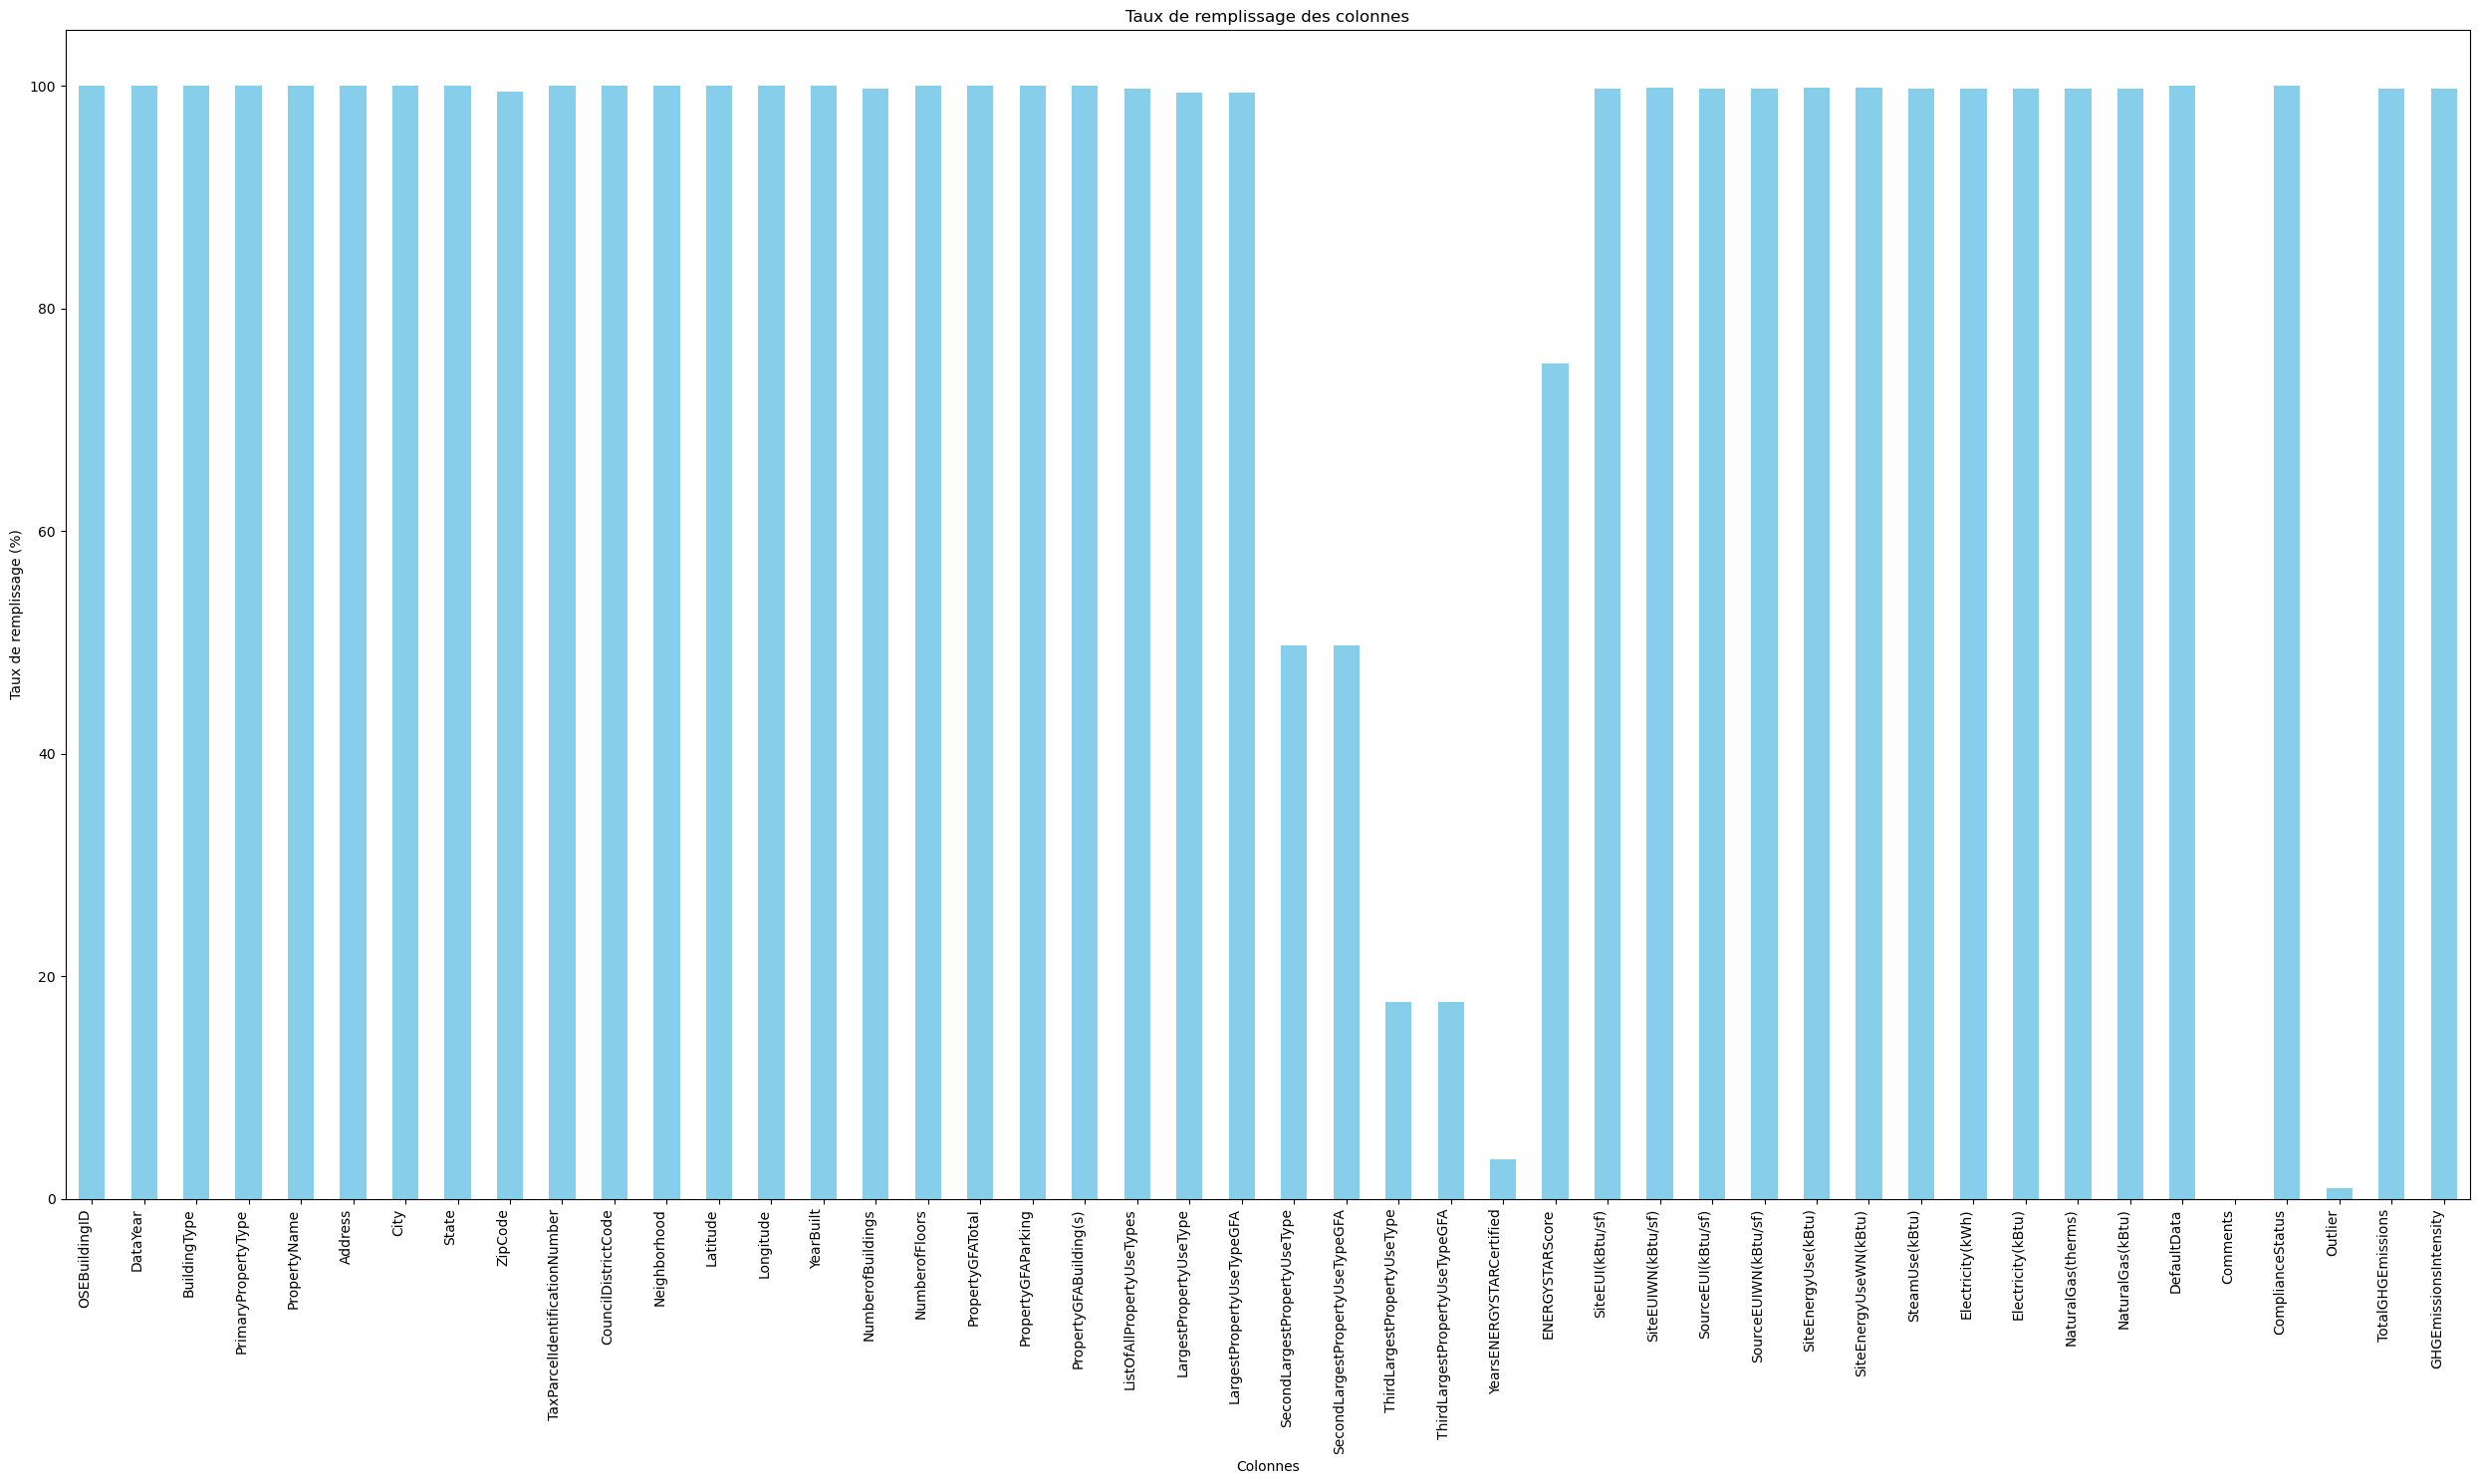

In [3]:
# Calculer le taux de remplissage de chaque colonne
fill_rate = df.notna().mean() * 100

# Créer un graphique
plt.figure(figsize=(25, 15))
fill_rate.plot(kind='bar', color='skyblue')
plt.title('Taux de remplissage des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Taux de remplissage (%)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


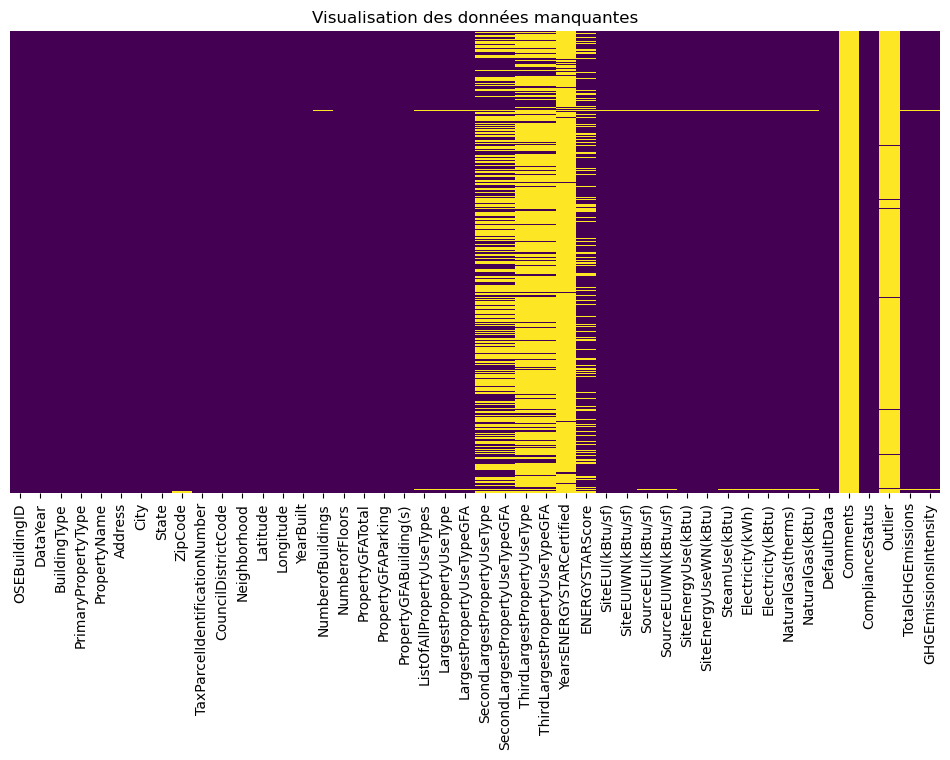

In [4]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()

# Afficher les résultats
print(missing_data)

# Optionnel: Afficher un résumé plus complet
print("\nRésumé des données manquantes :")
print(df.isnull().sum().sort_values(ascending=False))

# Optionnel: Afficher un graphique pour visualiser les données manquantes


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

# rechercher les colonnes completement vide et les supprimer 

In [5]:
# Trouver les colonnes entièrement vides
empty_columns = df.columns[df.isna().all()]

# Afficher les colonnes vides
print("Colonnes complètement vides :", empty_columns.tolist())


Colonnes complètement vides : ['Comments']


In [6]:
# Supprimer les colonnes entièrement vides
df = df.dropna(axis=1, how='all')

# Afficher le DataFrame après suppression
df.shape

(3376, 45)

# OSEBuildingID:
Un identifiant unique attribué à chaque propriété couverte par le Seattle Benchmarking Ordinance pour le suivi et l'identification.

In [7]:
# Colonne à vérifier
column_to_check = 'OSEBuildingID'

# Vérification si la colonne peut être une clé primaire
is_primary_key = df[column_to_check].is_unique and not df[column_to_check].isnull().any()

if is_primary_key:
    print(f"La colonne '{column_to_check}' peut être une clé primaire.")
else:
    print(f"La colonne '{column_to_check}' ne peut pas être une clé primaire.")

La colonne 'OSEBuildingID' peut être une clé primaire.


In [8]:
# Suppression de la colonne OSEBuildingID
df = df.drop(columns=['OSEBuildingID'])

# Vérification
df.shape

(3376, 44)

# la colonne data year  :
Année civile (janvier-décembre) représentée par chaque enregistrement de données.

In [9]:
# la colonne datayear : 
df['DataYear'].value_counts() 

2016    3376
Name: DataYear, dtype: int64

### déssision métier ; on va supprimer cette colonne car elle ne va rien apporter à notre étude 

In [10]:
# Suppression de la colonne DataYear
df = df.drop(columns=['DataYear'])

# Vérification
df.shape

(3376, 43)

# BuildingType : 
Classification des types de bâtiments selon la ville de Seattle.

In [11]:
# la colonne BuildingType                           : 
df['BuildingType'].value_counts() #(invistiguer pour le cos on ne sait jamais si il y a des batiment residentielle dans les 85 batiments )

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

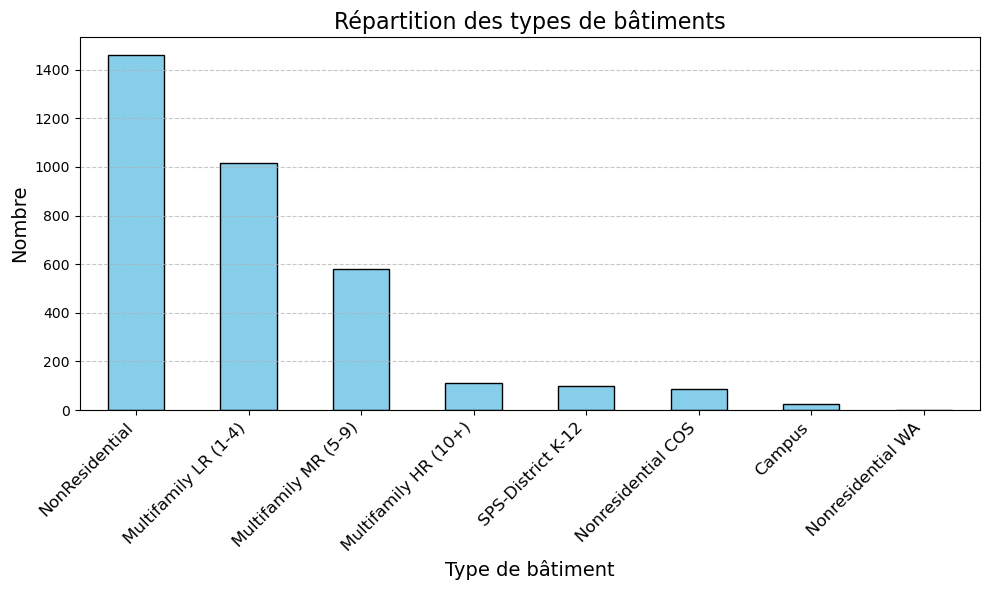

In [12]:
# Value counts
value_counts = df['BuildingType'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

### on va supprimer les lignes ou c'est des batimment résidentiels

In [13]:
# Liste des valeurs à supprimer
values_to_remove = ['Multifamily LR (1-4)', 'Multifamily MR (5-9)', 'Multifamily HR (10+)']

# Supprimer les lignes où BuildingType correspond aux valeurs spécifiées
df = df[~df['BuildingType'].isin(values_to_remove)]

# Vérification
df.shape 

(1668, 43)

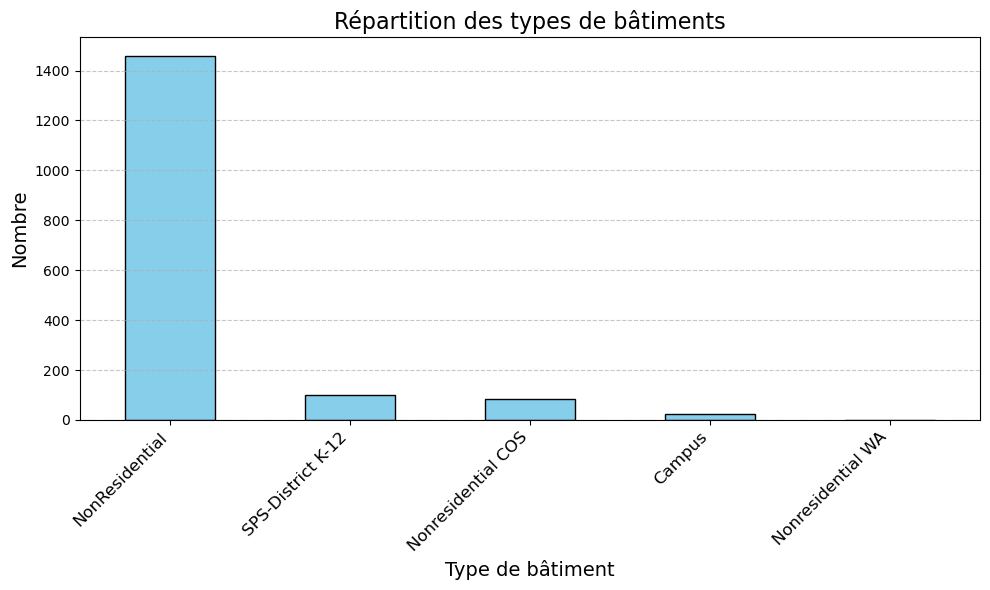

In [14]:
# Value counts
value_counts = df['BuildingType'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

In [15]:
df.shape

(1668, 43)

# PrimaryPropertyType
-L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). 
-L'utilisation principale est définie comme une fonction représentant plus de 50 % de la propriété. 
-Il s'agit du champ Type de propriété - Calculé par l'EPA dans Portfolio Manager.

In [16]:
# la colonne PrimaryPropertyType                           : 
df['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

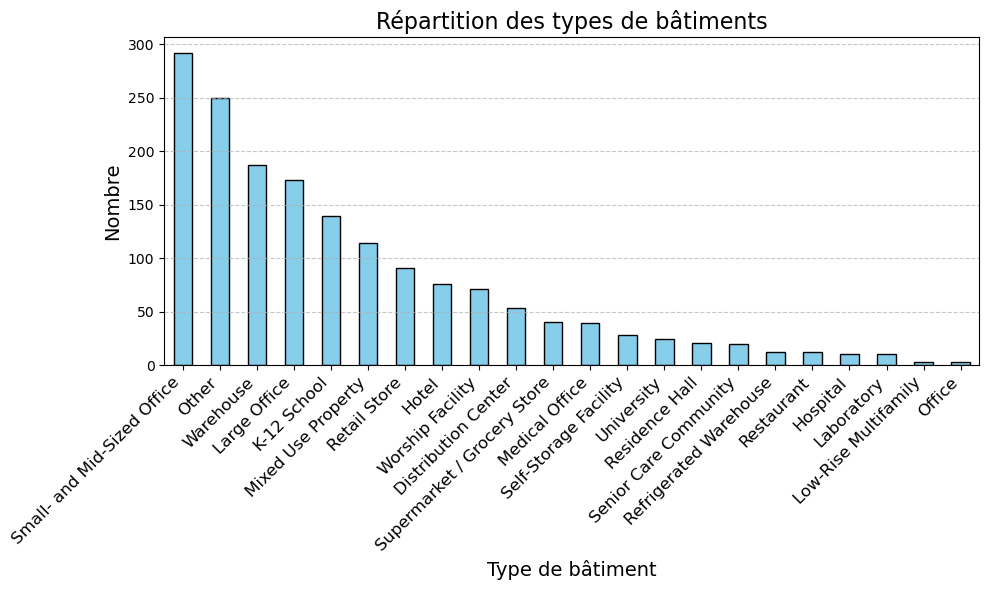

In [17]:
# Value counts
value_counts = df['PrimaryPropertyType'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

In [18]:
# Filtrer les lignes où PrimaryPropertyType est "Other"
filtered_df = df[df['PrimaryPropertyType'] == 'Other']

# Afficher les résultats
filtered_df


,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
5,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.0,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,Compliant,NaN,301.81,3.10
7,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,DOWNTOWN,47.61327,-122.33136,1926,1.0,8,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6.298132e+06,7.067882e+06,2276286.5,1.065843e+06,3.636655e+06,3851.890137,3.851890e+05,False,Compliant,NaN,221.51,2.16
15,Nonresidential COS,Other,The Seattle Public Library - Central Library,1000 Fourth Avenue,Seattle,WA,98154.0,0942000275,7,DOWNTOWN,47.60649,-122.33297,2004,1.0,11,412000,57000,355000,"Data Center, Library, Parking",Library,364913.0,Parking,49000.0,Data Center,1074.0,NaN,NaN,50.799999,51.099998,155.600006,156.000000,1.858886e+07,1.870691e+07,737559.5,5.231916e+06,1.785130e+07,0.000000,0.000000e+00,False,Compliant,NaN,181.38,0.44
16,NonResidential,Other,Downtown Seattle YMCA,909 4th Avenue,Seattle,WA,98104.0,0942000350,7,DOWNTOWN,47.60546,-122.33279,1930,1.0,6,103911,0,103911,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN,NaN,76.599998,78.400002,157.399994,159.600006,9.956396e+06,1.019212e+07,4592347.5,1.305354e+06,4.453868e+06,9101.799805,9.101800e+05,False,Compliant,NaN,433.86,4.18
20,NonResidential,Other,King County Courthouse,516 3RD AVE,Seattle,WA,98104.0,0942000860,7,DOWNTOWN,47.60265,-122.33051,1916,1.0,10,540360,0,540360,Courthouse,Courthouse,537150.0,NaN,NaN,NaN,NaN,NaN,76.0,83.699997,87.500000,182.699997,186.699997,4.498447e+07,4.702309e+07,0.0,7.138872e+06,2.435783e+07,206266.312500,2.062663e+07,False,Compliant,NaN,1265.29,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,Nonresidential COS,Other,Ballard Pool,1471 NW 67th St,Seattle,WA,NaN,3050700005,6,BALLARD,47.67734,-122.37624,1972,1.0,1,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,10912.0,Fitness Center/Health Club/Gym,1670.0,Office,187.0,NaN,NaN,400.799988,420.600006,618.099976,638.900024,5.117308e+06,5.370264e+06,0.0,3.532161e+05,1.205173e+06,39121.351560,3.912135e+06,False,Compliant,NaN,216.18,16.93
3367,Nonresidential COS,Other,Conservatory Campus,1400 E Galer St,Seattle,WA,NaN,2925049087,3,EAST,47.63228,-122.31574,1912,1.0,1,23445,0,23445,Other - Recreation,Other - Recreation,23445.0,NaN,NaN,NaN,NaN,NaN,NaN,254.899994,286.500000,380.100006,413.200012,5.976246e+06,6.716330e+06,0.0,3.695398e+05,1.260870e+06,47153.757810,4.715376e+06,False,Compliant,NaN,259.22,11.06
3370,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,Na

In [19]:
# Filtrer les lignes où PrimaryPropertyType est "Other"
filtered_df = df[df['PrimaryPropertyType'] == 'Mixed Use Property']

# Afficher les résultats
filtered_df


,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
18,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,Seattle,WA,98104.0,0942000510,7,DOWNTOWN,47.60515,-122.33159,1907,1.0,5,57452,0,57452,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0,NaN,NaN,132.399994,137.100006,280.700012,285.000000,7.606084e+06,7.877219e+06,1776201.875,1.103397e+06,3.764791e+06,2.065091e+04,2.065091e+06,False,Compliant,NaN,273.02,4.75
35,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,4.483853e+08,4.716139e+08,0.000,4.410208e+07,1.504763e+08,2.979090e+06,2.979090e+08,False,Compliant,NaN,16870.98,34.09
47,NonResidential,Mixed Use Property,Mann Building,1401 3rd Avenue,Seattle,WA,98101.0,1975700525,7,DOWNTOWN,47.60886,-122.33744,1926,1.0,2,52549,0,52549,"Office, Other - Entertainment/Public Assembly,...",Other - Entertainment/Public Assembly,23500.0,Restaurant,23500.0,Office,5459.0,NaN,NaN,286.399994,299.000000,485.299988,495.500000,1.502620e+07,1.568374e+07,0.000,1.357696e+06,4.632459e+06,1.039374e+05,1.039374e+07,False,Compliant,NaN,584.31,11.12
65,NonResidential,Mixed Use Property,Central Seattle,921 Terry Ave.,Seattle,WA,98104.0,1979200290,3,EAST,47.60845,-122.32637,1983,1.0,6,99780,9341,90439,"Data Center, Medical Office, Non-Refrigerated ...",Medical Office,40174.0,Parking,20868.0,Office,17020.0,NaN,NaN,204.500000,207.300003,505.799988,504.299988,1.547312e+07,1.568437e+07,5327802.500,2.973421e+06,1.014531e+07,0.000000e+00,0.000000e+00,False,Compliant,NaN,481.97,4.83
164,NonResidential,Mixed Use Property,TriBeCa,516 1st Ave W,Seattle,WA,98119.0,8681450000,7,MAGNOLIA / QUEEN ANNE,47.62390,-122.35756,2002,1.0,4,110785,0,110785,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,58563.0,Supermarket/Grocery Store,48520.0,Parking,29839.0,NaN,NaN,95.300003,98.099998,291.399994,299.000000,1.055791e+07,1.086403e+07,0.000,2.971734e+06,1.013956e+07,4.183540e+03,4.183540e+05,False,Compliant,NaN,92.91,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,NonResidential,Mixed Use Property,AIBS,601 Westlake Ave N.,Seattle,WA,98109.0,4088803385,7,LAKE UNION,47.62497,-122.33883,2015,1.0,6,345290,85028,260262,"Data Center, Laboratory, Museum, Office, Other...",Laboratory,151523.0,Office,106498.0,Parking,84002.0,NaN,NaN,144.500000,150.800003,333.100006,335.799988,3.936412e+07,4.107860e+07,0.000,6.927551e+06,2.363680e+07,1.572731e+05,1.572731e+07,False,Compliant,NaN,1000.06,2.90
3360,Nonresidential COS,Mixed Use Property,Northgate Community Center,10510 5th Ave NE,Seattle,WA,NaN,2926049431,5,NORTH,47.70541,-122.32232,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0,NaN,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05

In [20]:
df.shape

(1668, 43)

In [21]:
df = df.drop(columns='PrimaryPropertyType')
df.shape

(1668, 42)

# PropertyName
Nom officiel ou courant de la propriété tel qu'il est saisi dans le Portfolio Manager de l'EPA.


In [22]:
# la colonne PropertyName                           : 
df['PropertyName'].value_counts()

South Park                     2
Bayview Building               2
Canal Building                 2
Airport Way                    2
Mayflower park hotel           1
                              ..
601 Pine St                    1
Medical Dental Building        1
Eighth & Olive - New           1
Columbia Center - 2015         1
Van Asselt Community Center    1
Name: PropertyName, Length: 1664, dtype: int64

In [23]:
# Supprimer la colonne PropertyName
df = df.drop(columns=['PropertyName'])

# Vérification
df.shape

(1668, 41)

# Address : 
Adresse de la propriété (adresse de la rue).

In [24]:
# Supprimer la colonne Address
df = df.drop(columns=['Address'])

# Vérification
df.shape

(1668, 40)

# city : 
ville 

In [25]:
# la colonne City                           : 
df['City'].value_counts()

Seattle    1668
Name: City, dtype: int64

In [26]:
# Supprimer la colonne City
df = df.drop(columns=['City'])

# Vérification
df.shape

(1668, 39)

# State: 
l'etat 

In [27]:
# la colonne State                           : 
df['State'].value_counts()

WA    1668
Name: State, dtype: int64

In [28]:
# Supprimer la colonne State
df = df.drop(columns=['State'])

# Vérification
df.shape

(1668, 38)

# Neighborhood : 
le quartier 

In [29]:
# la colonne Neighborhood                           : 
df['Neighborhood'].value_counts()

DOWNTOWN                  361
GREATER DUWAMISH          346
MAGNOLIA / QUEEN ANNE     151
LAKE UNION                148
NORTHEAST                 128
EAST                      121
NORTHWEST                  81
BALLARD                    64
NORTH                      58
CENTRAL                    51
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

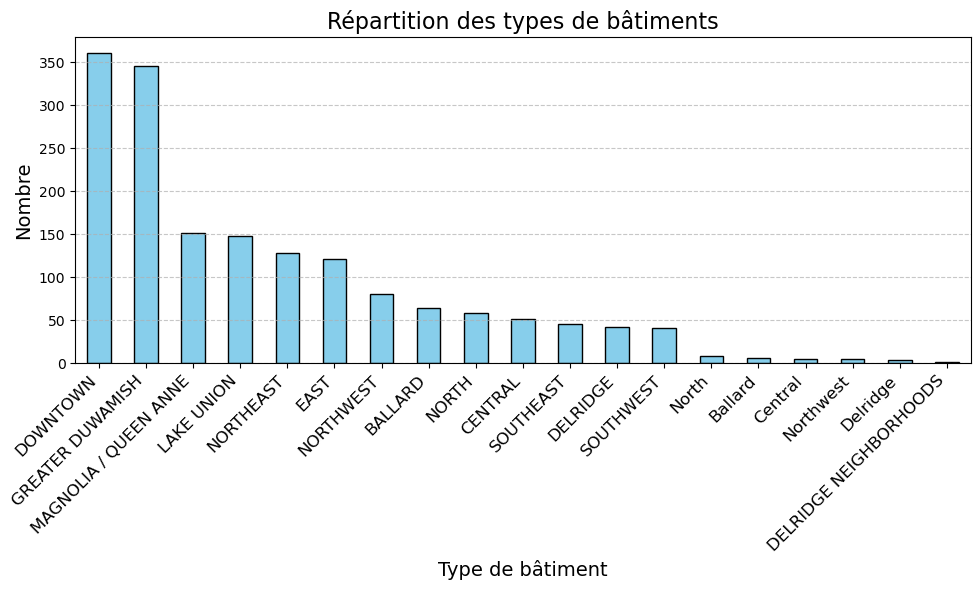

In [30]:
# Value counts
value_counts = df['Neighborhood'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

In [31]:
#supprimer cette colonne ?? 

# Supprimer la colonne State
df = df.drop(columns=['Neighborhood'])

# Vérification
df.shape

(1668, 37)

# ZipCode : 
code postale

In [32]:
# la colonne 'ZIPCODE'
# Supprimer la ZIPCODE
df = df.drop(columns=['ZipCode'])

# Vérification
df.shape

(1668, 36)

# TaxParcelIdentificationNumber :
Numéro d'Identification de Parcelle Fiscale

In [33]:
# la colonne 'TaxParcelIdentificationNumber'
# Supprimer la TaxParcelIdentificationNumber
df = df.drop(columns=['TaxParcelIdentificationNumber'])

# Vérification
df.shape

(1668, 35)

# CouncilDistrictCode: 
District du conseil municipal de la ville de Seattle. 

In [34]:
df['CouncilDistrictCode']

0       7
1       7
2       7
3       7
4       7
       ..
3371    2
3372    2
3373    7
3374    1
3375    2
Name: CouncilDistrictCode, Length: 1668, dtype: int64

In [35]:
# la colonne 'CouncilDistrictCode'
# Supprimer la CouncilDistrictCode
df = df.drop(columns=['CouncilDistrictCode'])

# Vérification
df.shape

(1668, 34)

# YearBuilt: 
Année de construction de l'immeuble. 

In [36]:
# la colonne YearBuilt                           : 
df['YearBuilt'].value_counts()

1900    46
2000    35
1970    33
1910    31
1960    30
        ..
1944     2
1939     2
1901     2
1936     1
1935     1
Name: YearBuilt, Length: 113, dtype: int64

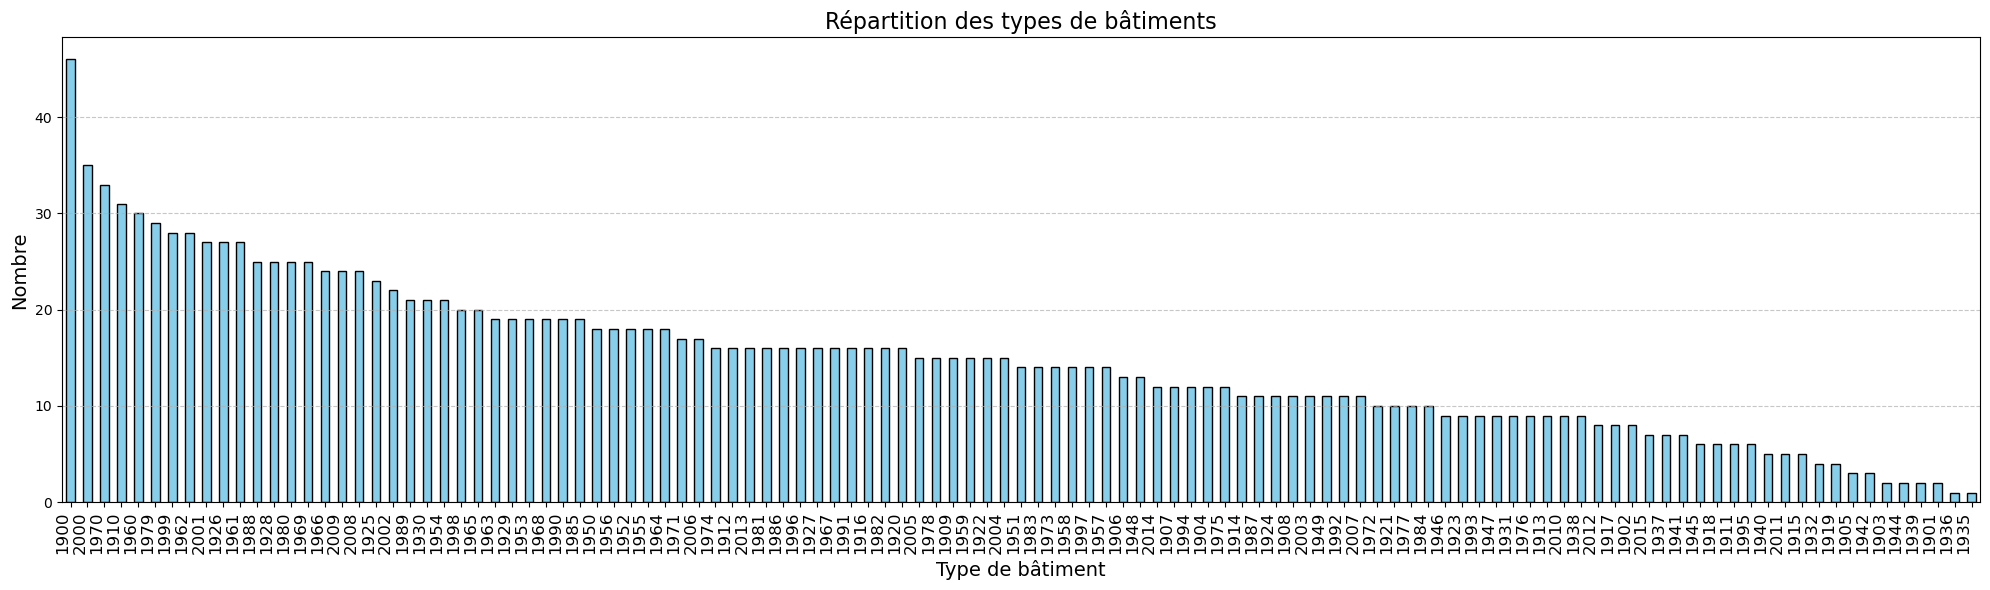

In [37]:
# Value counts
value_counts = df['YearBuilt'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

### on va transformer cette colonne en age de l'immeuble 

In [38]:
from datetime import datetime

# Calculer l'année actuelle
current_year = datetime.now().year

# Remplacer la colonne 'YearBuilt' par l'âge de l'immeuble
df['YearBuilt'] = current_year - df['YearBuilt']

# Renommer la colonne en 'age_de_immeuble'
df.rename(columns={'YearBuilt': 'age_de_immeuble'}, inplace=True)

# Afficher les premières lignes pour vérification
df.head()

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,47.61220,-122.33799,98,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,NaN,249.98,2.83
1,NonResidential,47.61317,-122.33393,29,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,NaN,295.86,2.86
2,NonResidential,47.61393,-122.33810,56,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,NaN,2089.28,2.19
3,NonResidential,47.61412,-122.33664,99,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,NaN,286.43,4.67
4,NonResidential,47.61375,-122.34047,45,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,NaN,505.01,2.88


# NumberofBuildings
Nombre de bâtiments inclus dans le rapport de la propriété. Dans les cas où une propriété est déclarée comme un campus, plusieurs bâtiments peuvent être inclus dans un seul rapport.

In [39]:
# la colonne NumberofBuildings                           : 
df['NumberofBuildings'].value_counts()

1.0      1561
0.0        52
2.0        14
3.0        12
5.0         8
4.0         4
6.0         4
14.0        2
8.0         2
27.0        1
11.0        1
9.0         1
7.0         1
23.0        1
10.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

In [40]:
# Supprimer la colonne NumberofBuildings
df = df.drop(columns=['NumberofBuildings'])

# Vérification
df.shape

(1668, 33)

# NumberofFloors
Nombre d'étages déclarés dans le Portfolio Manager.

In [41]:
# la colonne NumberofFloors                           : 
df['NumberofFloors'].value_counts()

1     465
2     391
3     270
4     146
5     102
6      84
7      34
8      22
10     18
11     18
0      16
14      9
12      9
9       8
13      7
15      6
42      5
19      5
17      4
16      3
21      3
22      3
23      3
29      3
18      3
20      3
24      3
25      3
33      3
36      2
34      2
41      2
46      1
99      1
27      1
76      1
56      1
30      1
28      1
55      1
63      1
37      1
49      1
47      1
39      1
Name: NumberofFloors, dtype: int64

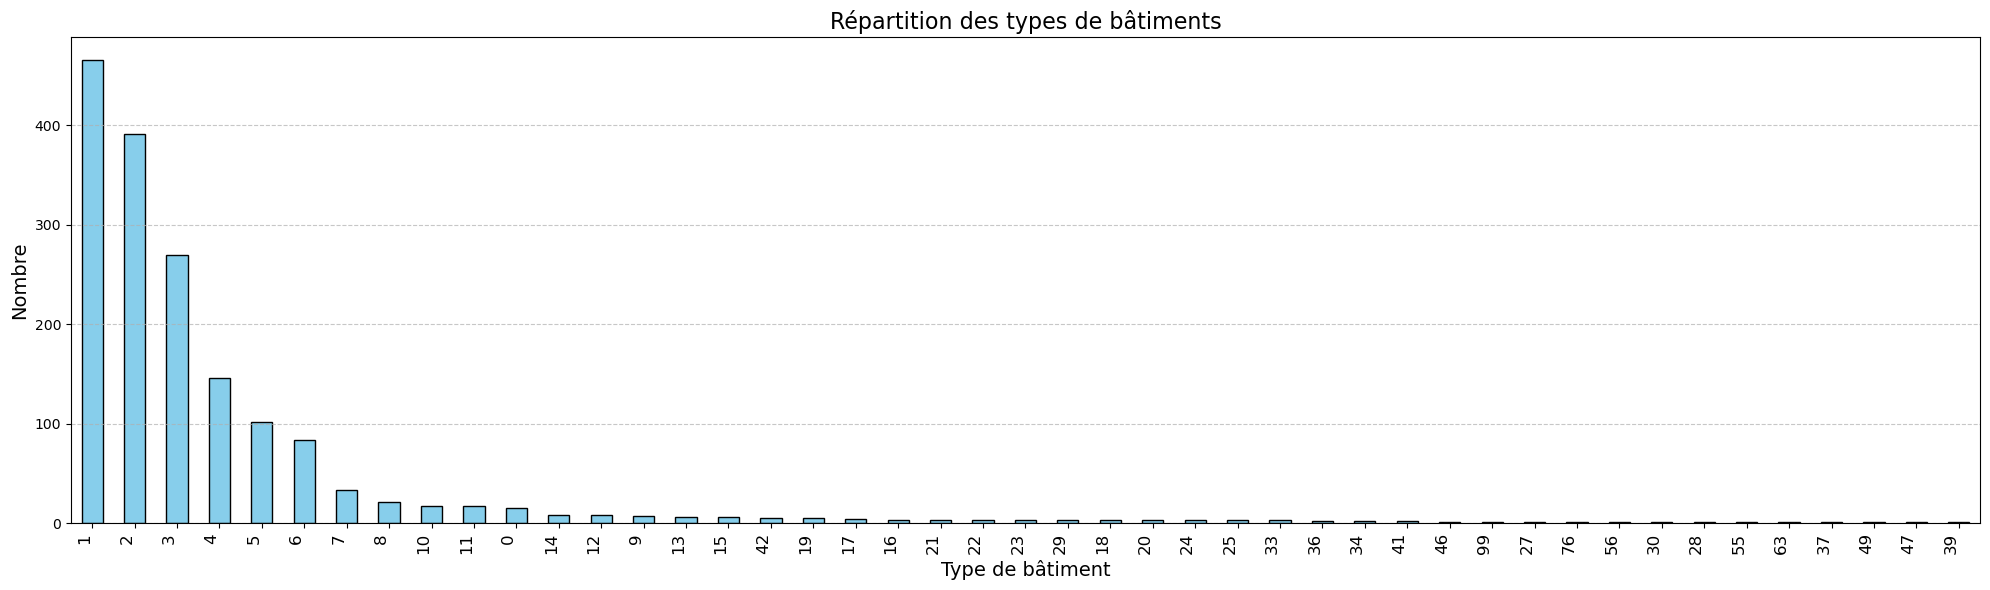

In [42]:
# Value counts
value_counts = df['NumberofFloors'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

# PropertyGFATotal
Surface brute totale du bâtiment et du stationnement.

In [43]:
# la colonne PropertyGFATotal                           : 
df['PropertyGFATotal'].describe()

count    1.668000e+03
mean     1.188427e+05
std      2.973622e+05
min      1.128500e+04
25%      2.947775e+04
50%      4.928950e+04
75%      1.053250e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

### supressiion de cette colonne car remplassable par GFA PARKING ET PropertyGFABuilding 

In [44]:
# Supprimer la colonne PropertyGFATotal
df = df.drop(columns=['PropertyGFATotal'])

# Vérification
df.shape

(1668, 32)

# PropertyGFAParking
Espace total en pieds carrés de tous les types de stationnement (entièrement fermé, partiellement fermé et ouvert).

In [45]:
# la colonne PropertyGFAParking                           : 
df['PropertyGFAParking'].value_counts()

0         1335
13320        3
10800        2
30000        2
25800        2
          ... 
47656        1
115228       1
33921        1
44728        1
85028        1
Name: PropertyGFAParking, Length: 327, dtype: int64

# PropertyGFABuilding(s)
Surface totale en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un ou plusieurs bâtiments. Cela inclut toutes les zones à l'intérieur du ou des bâtiments, telles que les espaces des locataires, les espaces communs, les escaliers, les sous-sols, les zones de stockage, etc.

In [46]:
# la colonne PropertyGFABuilding(s)                           : 
df['PropertyGFABuilding(s)'].value_counts()

28800     7
25920     7
36000     7
21600     6
24000     5
         ..
89893     1
63644     1
111908    1
61200     1
18258     1
Name: PropertyGFABuilding(s), Length: 1585, dtype: int64

# ListOfAllPropertyUseTypes
All property uses reported in Portfolio Manager

In [47]:
# la colonne PropertyGFAParking                           : 
df['ListOfAllPropertyUseTypes'].value_counts()

Office                                                                                    138
K-12 School                                                                               135
Office, Parking                                                                           120
Non-Refrigerated Warehouse                                                                101
Non-Refrigerated Warehouse, Office                                                         61
                                                                                         ... 
Office, Other, Retail Store, Swimming Pool                                                  1
Medical Office, Office, Other, Other - Services, Parking, Retail Store                      1
Parking, Restaurant                                                                         1
Fast Food Restaurant, Medical Office, Movie Theater, Parking, Retail Store                  1
Fitness Center/Health Club/Gym, Office, Other - Recreation, 

### colonne à supprimer : 


In [48]:
# Supprimer la colonne ListOfAllPropertyUseTypes
df = df.drop(columns=['ListOfAllPropertyUseTypes'])

# Vérification
df.shape

(1668, 31)

# LargestPropertyUseType
Le principal type d'utilisation d'une propriété (par exemple, bureau, magasin de détail) basé sur la surface brute (GFA).

In [49]:
# la colonne LargestPropertyUseType                           : 
df['LargestPropertyUseType'].value_counts()

Office                                                  497
Non-Refrigerated Warehouse                              199
K-12 School                                             139
Retail Store                                             99
Other                                                    98
Hotel                                                    76
Worship Facility                                         71
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
Senior Care Community                   

# LargestPropertyUseTypeGFA
La surface brute (GFA) correspondant au principal type d'utilisation de la propriété.

In [50]:
# la colonne LargestPropertyUseTypeGFA                           : 
df['LargestPropertyUseTypeGFA'].describe()

count    1.662000e+03
mean     9.876469e+04
std      2.767111e+05
min      5.656000e+03
25%      2.552750e+04
50%      4.377050e+04
75%      9.198375e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

# SecondLargestPropertyUseType
Le deuxième type d'utilisation le plus important d'une propriété (par exemple, bureau, magasin de détail) basé sur la surface brute (GFA).

In [51]:
# la colonne SecondLargestPropertyUseType                           : 
df['SecondLargestPropertyUseType'].value_counts()

Parking                                                 336
Office                                                  167
Retail Store                                             85
Other                                                    45
Non-Refrigerated Warehouse                               30
Restaurant                                               29
Fitness Center/Health Club/Gym                           16
Data Center                                              13
Multifamily Housing                                      12
Other - Services                                         11
Supermarket/Grocery Store                                10
Laboratory                                                8
Medical Office                                            8
Bank Branch                                               7
Other - Entertainment/Public Assembly                     7
Distribution Center                                       7
K-12 School                             

# SecondLargestPropertyUseTypeGFA
La surface brute (GFA) correspondant au deuxième type d'utilisation le plus important de la propriété.

In [52]:
# la colonne SecondLargestPropertyUseTypeGFA                           : 
df['SecondLargestPropertyUseTypeGFA'].describe()

count       855.000000
mean      36804.160581
std       69845.261024
min           0.000000
25%        5350.000000
50%       12000.000000
75%       31881.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

# ThirdLargestPropertyUseType
Le troisième type d'utilisation le plus important d'une propriété (par exemple, bureau, magasin de détail) basé sur la surface brute (GFA).

In [53]:
# la colonne ThirdLargestPropertyUseType                           : 
df['ThirdLargestPropertyUseType'].value_counts()

Office                                                  49
Retail Store                                            48
Parking                                                 46
Other                                                   39
Restaurant                                              32
Non-Refrigerated Warehouse                              15
Data Center                                             14
Multifamily Housing                                     12
Swimming Pool                                           10
Medical Office                                           9
Social/Meeting Hall                                      8
Food Service                                             8
Pre-school/Daycare                                       8
Bank Branch                                              5
Other - Restaurant/Bar                                   5
Financial Office                                         4
Fitness Center/Health Club/Gym                          

# ThirdLargestPropertyUseTypeGFA
La surface brute (GFA) correspondant au troisième type d'utilisation le plus important de la propriété.

In [54]:
# la colonne ThirdLargestPropertyUseTypeGFA                           : 
df['ThirdLargestPropertyUseTypeGFA'].describe()

count       353.00000
mean      14923.13994
std       36790.55656
min           0.00000
25%        2663.00000
50%        5931.00000
75%       12941.00000
max      459748.00000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

# YearsENERGYSTARCertified
Nombre d'années pendant lesquelles la propriété a obtenu la certification ENERGY STAR.

In [55]:
# la colonne YearsENERGYSTARCertified                           : 
df['YearsENERGYSTARCertified'].value_counts()

2016                    12
2017                     5
2013                     4
2009                     4
20162015                 4
                        ..
2017201520142013         1
201620152012             1
2012201020072006         1
20152014201220112009     1
20162015201020092008     1
Name: YearsENERGYSTARCertified, Length: 64, dtype: int64

In [56]:
# Supprimer la colonne YearsENERGYSTARCertified
df = df.drop(columns=['YearsENERGYSTARCertified'])

# Vérification
df.shape

(1668, 30)

# ENERGYSTARScore
Une évaluation de 1 à 100 calculée par l'EPA qui mesure la performance énergétique globale d'une propriété, basée sur des données nationales pour tenir compte des différences liées au climat, aux usages des bâtiments et aux opérations. Un score de 50 représente la médiane nationale.

In [57]:
# la colonne ENERGYSTARScore                           : 
df['ENERGYSTARScore'].value_counts()

100.0    40
89.0     27
98.0     27
95.0     26
96.0     24
         ..
24.0      3
7.0       3
13.0      3
39.0      3
9.0       3
Name: ENERGYSTARScore, Length: 100, dtype: int64

In [58]:
# la colonne ENERGYSTARScore                           : 
df['ENERGYSTARScore'].describe()

count    1094.000000
mean       65.449726
std        28.492928
min         1.000000
25%        48.000000
50%        73.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

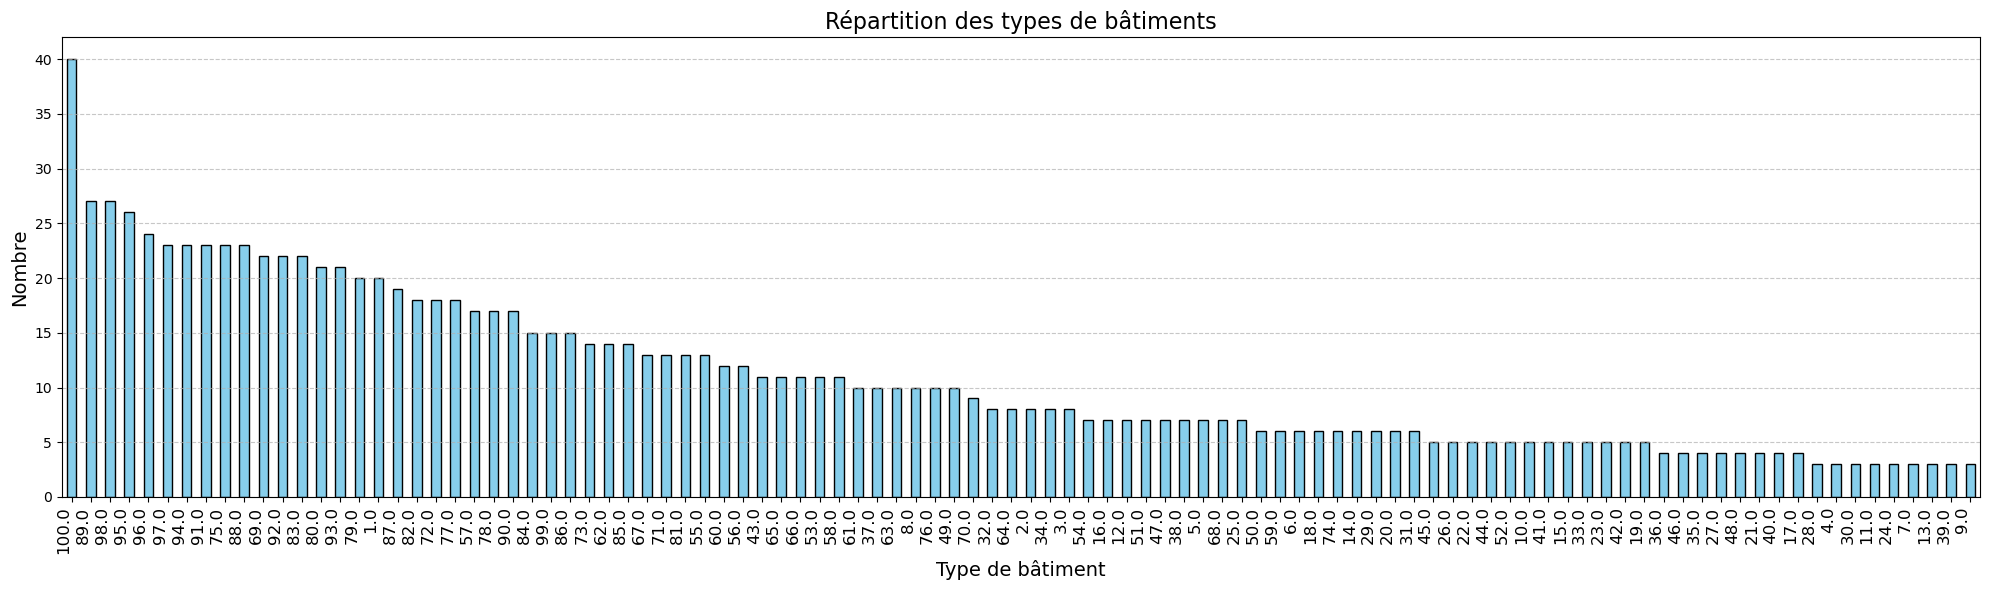

In [59]:
# Value counts
value_counts = df['ENERGYSTARScore'].value_counts()

# Création d'un histogramme
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des types de bâtiments', fontsize=16)
plt.xlabel('Type de bâtiment', fontsize=14)
plt.ylabel('Nombre', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste la mise en page
plt.show()

In [60]:
#rechercher les ligne ou il n ya pas de valeur pour la colonne  ENERGYSTARScore
missing_energystar = df[df["ENERGYSTARScore"].isna()]

# Afficher les lignes concernées
print("Lignes avec ENERGYSTARScore manquant :")
missing_energystar.shape

Lignes avec ENERGYSTARScore manquant :


(574, 30)

### devrions nous supprimmer ces valeurs ? oui 

In [61]:
df.shape

(1668, 30)

In [62]:
df.dropna(subset=['ENERGYSTARScore'], inplace=True)
df.shape

(1094, 30)

# SiteEUI(kBtu/sf)
L'intensité énergétique du site (EUI) est la consommation d'énergie totale du site d'une propriété, divisée par sa surface brute. La consommation d'énergie du site correspond à la quantité annuelle totale d'énergie consommée par la propriété sur place, telle que rapportée sur les factures d'utilités. L'intensité énergétique est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.

In [63]:
# la colonne SiteEUI(kBtu/sf)                           : 
df['SiteEUI(kBtu/sf)'].value_counts()

52.700001    7
43.000000    5
48.000000    5
39.500000    5
37.200001    5
            ..
73.300003    1
50.900002    1
87.400002    1
45.299999    1
40.900002    1
Name: SiteEUI(kBtu/sf), Length: 690, dtype: int64

### suppression des colonne qui se rapporte à la surface : 

In [64]:
# la colonne SiteEUI(kBtu/sf)                           : 
df['SiteEUI(kBtu/sf)'].describe()

count    1094.000000
mean       65.628062
std        67.901083
min         0.000000
25%        33.700001
50%        48.900002
75%        72.900002
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

In [65]:
df = df.drop(columns=['SiteEUI(kBtu/sf)'], axis=1)
df.shape

(1094, 29)

# SiteEUIWN(kBtu/sf)
Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

In [66]:
# la colonne SiteEUIWN(kBtu/sf)                           : 
df['SiteEUIWN(kBtu/sf)'].value_counts()

0.000000      7
52.299999     6
46.400002     5
30.200001     5
53.000000     5
             ..
123.699997    1
108.300003    1
73.800003     1
311.700012    1
189.300003    1
Name: SiteEUIWN(kBtu/sf), Length: 725, dtype: int64

In [67]:
# la colonne SiteEUIWN(kBtu/sf)(kBtu/sf)                           : 
df['SiteEUIWN(kBtu/sf)'].describe()

count    1093.000000
mean       68.014730
std        68.688418
min         0.000000
25%        35.400002
50%        52.099998
75%        75.599998
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: float64

In [68]:
df = df.drop(columns=['SiteEUIWN(kBtu/sf)'], axis=1)
df.shape

(1094, 28)

# SourceEUI(kBtu/sf)
L'intensité énergétique de la source (Source EUI) est la consommation d'énergie de la propriété, incluant les pertes liées à la génération, la transmission et la distribution, divisée par la surface brute. Elle représente la quantité annuelle d'énergie utilisée pour le fonctionnement de la propriété. L'intensité énergétique de la source est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.

In [69]:
# la colonne SourceEUI(kBtu/sf)                        : 
df['SourceEUI(kBtu/sf)'].describe()

count    1094.000000
mean      164.419561
std       184.001841
min         0.000000
25%        77.325003
50%       124.849998
75%       187.374996
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

In [70]:
# la colonne SourceEUI(kBtu/sf)                          : 
df['SourceEUI(kBtu/sf)'].value_counts()

94.099998     4
148.500000    3
82.500000     3
124.099998    3
144.000000    3
             ..
256.600006    1
28.799999     1
26.799999     1
146.399994    1
64.099998     1
Name: SourceEUI(kBtu/sf), Length: 894, dtype: int64

In [71]:
# la colonne SourceEUIWN(kBtu/sf)                        : 
df['SourceEUIWN(kBtu/sf)'].describe()

count    1094.000000
mean      166.850731
std       184.137737
min        -2.100000
25%        79.800003
50%       128.599998
75%       190.074997
max      2620.000000
Name: SourceEUIWN(kBtu/sf), dtype: float64

In [72]:
df = df.drop(columns=['SourceEUI(kBtu/sf)'], axis=1)
df.shape

(1094, 27)

# SiteEnergyUse(kBtu)
La quantité annuelle totale d'énergie consommée par la propriété à partir de toutes les sources d'énergie.

In [73]:
# la colonne SiteEnergyUse(kBtu)                      : 
df['SiteEnergyUse(kBtu)'].describe()

count    1.094000e+03
mean     8.367097e+06
std      2.472845e+07
min      0.000000e+00
25%      1.281902e+06
50%      2.665526e+06
75%      7.282808e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [74]:
df = df.drop(columns=['SiteEnergyUse(kBtu)'], axis=1)
df.shape

(1094, 26)

# SiteEnergyUseWN(kBtu)
La quantité annuelle totale d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée selon les conditions climatiques moyennes sur une période de 30 ans.

In [75]:
# la colonne SiteEnergyUseWN(kBtu)                      : 
df['SiteEnergyUseWN(kBtu)'].describe()

count    1.093000e+03
mean     8.534073e+06
std      2.529527e+07
min      0.000000e+00
25%      1.369341e+06
50%      2.808275e+06
75%      7.483350e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [76]:
#rechercher les ligne ou il n ya pas de valeur pour la colonne  SiteEnergyUseWN(kBtu)
missing_SiteEnergyUseWN = df[df["SiteEnergyUseWN(kBtu)"].isna()]

# Afficher les lignes concernées
print("Lignes avec SiteEnergyUseWN(kBtu) manquant :")
missing_SiteEnergyUseWN.shape

Lignes avec SiteEnergyUseWN(kBtu) manquant :


(1, 26)

In [77]:
#supprimer la ligne 
df = df.dropna(subset=["SiteEnergyUseWN(kBtu)"])
df.shape 

(1093, 26)

# SteamUse(kBtu)
La quantité annuelle de vapeur de réseau consommée sur le site de la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).

In [78]:
# la colonne SteamUse(kBtu)                      : 
df['SteamUse(kBtu)'].describe()

count    1.093000e+03
mean     5.468361e+05
std      6.146685e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64

In [79]:
# ca fait parti de la targuet alors on supprime 
df = df.drop(columns=['SteamUse(kBtu)'], axis=1)
df.shape

(1093, 25)

# Electricity(kWh)
La quantité annuelle d'électricité consommée sur le site de la propriété, y compris l'électricité achetée auprès du réseau et celle produite par des systèmes renouvelables sur site, mesurée en kilowattheures (kWh).

In [80]:
# la colonne Electricity(kWh)                    : 
df['Electricity(kWh)'].describe()

count    1.093000e+03
mean     1.722398e+06
std      4.422637e+06
min     -3.382680e+04
25%      2.271293e+05
50%      5.193987e+05
75%      1.573633e+06
max      8.046087e+07
Name: Electricity(kWh), dtype: float64

# suppression de la colonne kwh 

In [81]:
df = df.drop("Electricity(kWh)", axis=1)
df.shape

(1093, 24)

# Electricity(kBtu)
La quantité annuelle d'électricité consommée sur le site de la propriété, y compris l'électricité achetée auprès du réseau et celle produite par des systèmes renouvelables sur site, mesurée en milliers d'unités thermiques britanniques (kBtu).

In [82]:
# la colonne Electricity(kBtu)                   : 
df['Electricity(kBtu)'].describe()

count    1.093000e+03
mean     5.876822e+06
std      1.509004e+07
min     -1.154170e+05
25%      7.749650e+05
50%      1.772188e+06
75%      5.369235e+06
max      2.745325e+08
Name: Electricity(kBtu), dtype: float64

In [83]:
# ca fait parti de la targuet alors on supprime 
df = df.drop(columns=['Electricity(kBtu)'], axis=1)
df.shape

(1093, 23)

# NaturalGas(therms)
La quantité annuelle de gaz naturel fourni par le service public et consommée par la propriété, mesurée en therms.

In [84]:
# la colonne NaturalGas(therms)                   : 
df['NaturalGas(therms)'].describe()

count    1.093000e+03
mean     1.907805e+04
std      1.080759e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.401860e+03
75%      1.383432e+04
max      2.979090e+06
Name: NaturalGas(therms), dtype: float64

In [85]:
# ca fait parti de la targuet alors on supprime 
df = df.drop(columns=['NaturalGas(therms)'], axis=1)
df.shape

(1093, 22)

# NaturalGas(kBtu)
La quantité annuelle de gaz naturel fourni par le service public et consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).

In [86]:
# la colonne NaturalGas(kBtu)                   : 
df['NaturalGas(kBtu)'].describe()

count    1.093000e+03
mean     1.907805e+06
std      1.080759e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.401860e+05
75%      1.383432e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

## suppression de cette colonne : 

In [87]:
# ca fait parti de la targuet alors on supprime 
df = df.drop(columns=['NaturalGas(kBtu)'], axis=1)
df.shape

(1093, 21)

# DefaultData
La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.
IL FAUT DABBORD SUPPRIMER LES 104 batiment qui ont des valeurs par defaut 

In [88]:
df['DefaultData'].value_counts()

False    1005
True       88
Name: DefaultData, dtype: int64

In [89]:
# Supprimer la colonne DefaultData et en suite on supprime la colonne 
df = df.drop(df[df['DefaultData'] == True].index)

# Vérification
df.shape

(1005, 21)

In [90]:
# on supprime la colonne 
df = df.drop("DefaultData", axis=1)
# Vérification
df.shape

(1005, 20)

# ComplianceStatus
Indique si une propriété a respecté les exigences de l'évaluation énergétique pour l'année de rapport en cours.

In [91]:
df['ComplianceStatus'].value_counts()


Compliant        996
Non-Compliant      9
Name: ComplianceStatus, dtype: int64

### ne garder que les compliant 

In [92]:
# on suprimme les lignes non-complient et en suite on supprime la colonne qui ne va plus nous servir : 
df = df.drop(df[df['ComplianceStatus'] == "Non-Compliant"].index)
# Vérification
df.shape

(996, 20)

In [93]:
#on supprime la colonne
df = df.drop("ComplianceStatus", axis=1)
# Vérification
df.shape

(996, 19)

# High or Low Outlier (Y/N)
Indique si une propriété est un décalage élevé (high outlier) ou un décalage faible (low outlier) par rapport aux normes établies. Y signifie oui, et N signifie non.

In [94]:
# la colonne Outlier                           : 
df['Outlier'].value_counts()

Series([], Name: Outlier, dtype: int64)

In [95]:
#on supprime la colonne
df = df.drop("Outlier", axis=1)
df.shape

(996, 18)

# TotalGHGEmissions
La quantité totale d'émissions de gaz à effet de serre (GES), comprenant le dioxyde de carbone, le méthane et le protoxyde d'azote, rejetés dans l'atmosphère en raison de la consommation d'énergie sur le site de la propriété. Ces émissions sont mesurées en tonnes métriques d'équivalent dioxyde de carbone (CO2e). Ce calcul utilise le facteur d'émissions GES provenant des ressources de production de Seattle City Light.

Facteur d'émissions 2015 de Seattle City Light : 52,44 lbs CO2e/MWh
Enwave vapeur : 170,17 lbs CO2e/MMBtu
Facteur de gaz provenant d'EPA Portfolio Manager : 53,11 kg CO2e/MBtu

In [96]:
df['TotalGHGEmissions'].describe()

count      996.000000
mean       195.148424
std        862.156107
min         -0.800000
25%         20.297500
50%         49.735000
75%        144.505000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [97]:
#rechercher les ligne ou il n ya pas de valeur pour la colonne  TotalGHGEmissions
missing_TotalGHGEmissions = df[df["TotalGHGEmissions"].isna()]

# Afficher les lignes concernées
print("Lignes avec TotalGHGEmissions manquant :")
missing_TotalGHGEmissions.shape

Lignes avec TotalGHGEmissions manquant :


(0, 18)

# GHGEmissionsIntensity
L'intensité des émissions de gaz à effet de serre (GES) est calculée en divisant le total des émissions de gaz à effet de serre (Total GHG Emissions) par la surface brute du bâtiment de la propriété. Elle est mesurée en kilogrammes d'équivalent dioxyde de carbone (CO2e) par pied carré.

Ce calcul utilise le facteur d'émissions GES provenant des ressources de production de Seattle City Light.

In [98]:
df['GHGEmissionsIntensity'].describe()

count    996.000000
mean       1.406958
std        2.026307
min       -0.020000
25%        0.330000
50%        0.740000
75%        1.700000
max       34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [99]:
#on supprime la colonne
df = df.drop("GHGEmissionsIntensity", axis=1)
df.shape

(996, 17)

In [100]:
import sweetviz as sv
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [101]:
# Afficher le rapport dans un fichier HTML
report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [102]:
df

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,98,12,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,189.000000,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,29,11,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.000000,61.0,179.399994,8.664479e+06,295.86
2,NonResidential,47.61393,-122.33810,56,41,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,244.100006,7.393711e+07,2089.28
3,NonResidential,47.61412,-122.33664,99,10,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,224.000000,6.946800e+06,286.43
4,NonResidential,47.61375,-122.34047,45,18,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.000000,75.0,215.600006,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,47.62251,-122.33390,11,13,197659,339038,Office,342838.0,Parking,202178.0,Retail Store,6313.200195,98.0,101.599998,1.403717e+07,245.16
3337,NonResidential,47.65476,-122.34732,11,4,41539,85284,Hotel,88157.0,Parking,41539.0,Swimming Pool,0.000000,72.0,169.500000,6.042400e+06,131.02
3338,NonResidential,47.54425,-122.31776,70,1,4222,47863,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,37.0,114.599998,4.182622e+06,157.70
3339,NonResidential,47.53161,-122.29944,96,2,0,24990,Office,24990.0,NaN,NaN,NaN,NaN,9.0,378.700012,4.731814e+06,134.80


# Analyses approfondie: 

# Heat Map pour étude des corrélations 

C:\Users\mario\AppData\Local\Temp\ipykernel_13432\2855255165.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


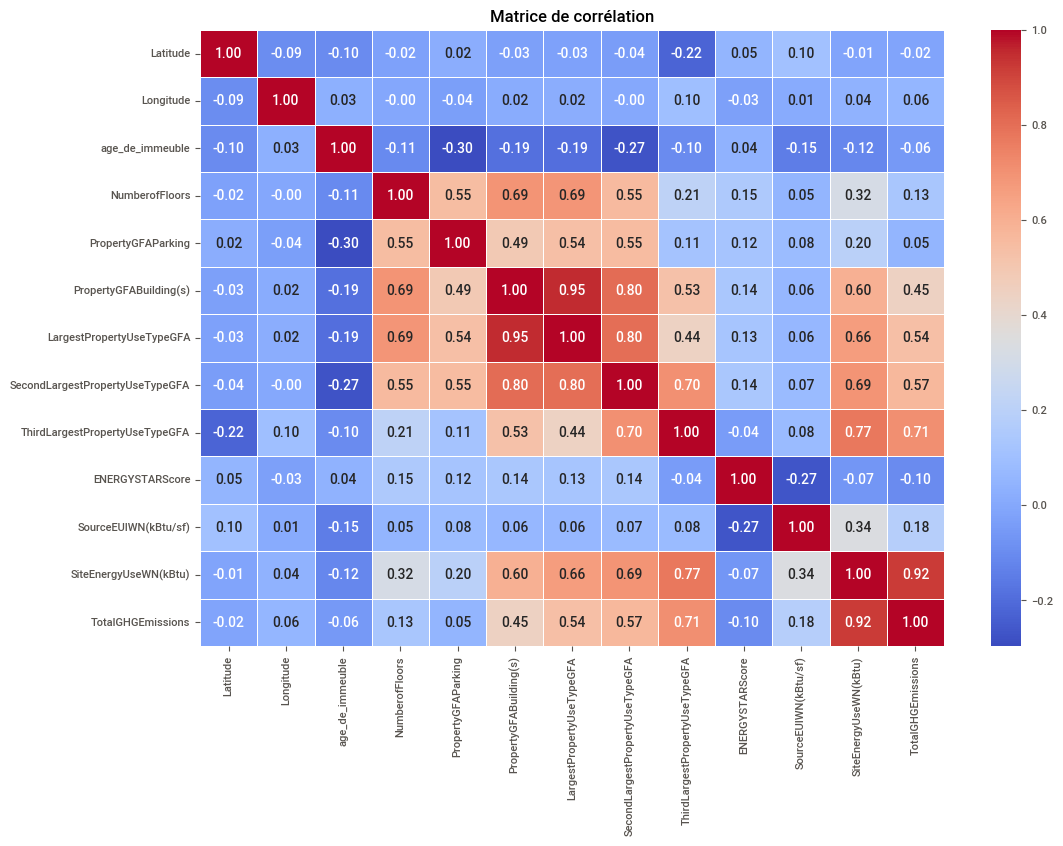

Colonnes fortement corrélées (corrélation > 0.90):
PropertyGFABuilding(s)  LargestPropertyUseTypeGFA    0.950875
TotalGHGEmissions       SiteEnergyUseWN(kBtu)        0.923698
dtype: float64


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la heatmap avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# Trouver les paires de colonnes fortement corrélées
threshold = 0.9  
strongly_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Supprimer les duplications (A avec B est identique à B avec A) et les corrélations triviales (avec soi-même)
strongly_correlated = strongly_correlated[strongly_correlated < 1].drop_duplicates()

# Afficher les colonnes fortement corrélées
print("Colonnes fortement corrélées (corrélation > {:.2f}):".format(threshold))
print(strongly_correlated[strongly_correlated > threshold])


# les deux colonne à supprimmer sont : 
    PropertyGFABuilding(s)  LargestPropertyUseTypeGFA

In [104]:
df = df.drop(columns=['LargestPropertyUseTypeGFA'])
df.shape

(996, 16)

# Revoir le taux de remplissage des données :

BuildingType                         0
Latitude                             0
Longitude                            0
age_de_immeuble                      0
NumberofFloors                       0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               2
SecondLargestPropertyUseType       505
SecondLargestPropertyUseTypeGFA    505
ThirdLargestPropertyUseType        841
ThirdLargestPropertyUseTypeGFA     841
ENERGYSTARScore                      0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUseWN(kBtu)                0
TotalGHGEmissions                    0
dtype: int64

Résumé des données manquantes :
ThirdLargestPropertyUseType        841
ThirdLargestPropertyUseTypeGFA     841
SecondLargestPropertyUseType       505
SecondLargestPropertyUseTypeGFA    505
LargestPropertyUseType               2
BuildingType                         0
Latitude                             0
Longitude                            0
age_de_immeuble   

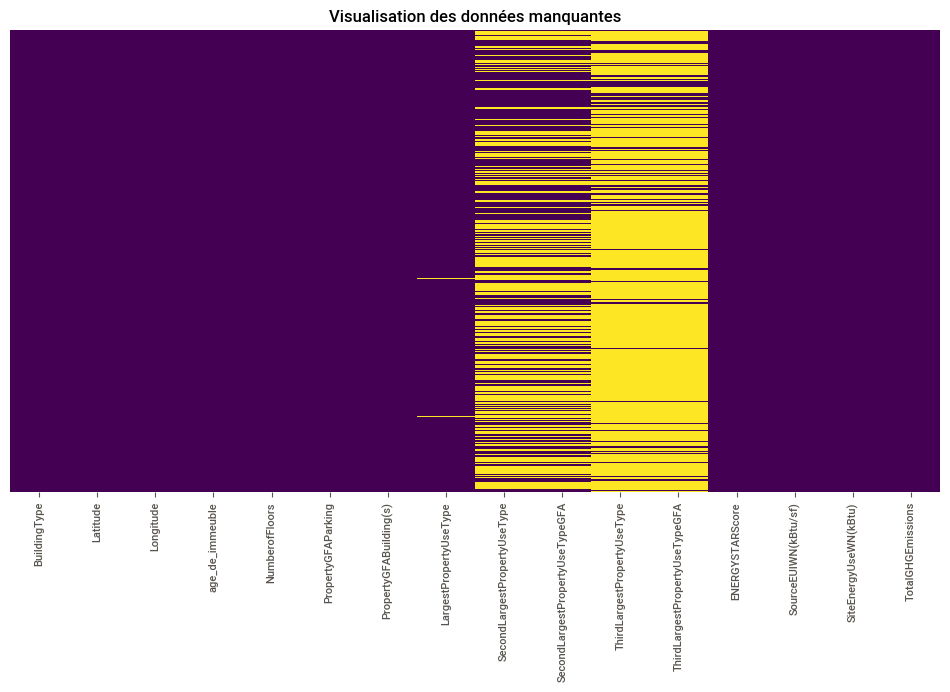

In [105]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()

# Afficher les résultats
print(missing_data)

# Optionnel: Afficher un résumé plus complet
print("\nRésumé des données manquantes :")
print(df.isnull().sum().sort_values(ascending=False))

# Optionnel: Afficher un graphique pour visualiser les données manquantes


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

In [106]:
#supprimer les 2 ligne ou il y a des nans dans  LargestPropertyUseType
df.dropna(subset=['LargestPropertyUseType', ], inplace=True)
df.shape

(994, 16)

# On va etudier les colonnes 
    ThirdLargestPropertyUseTypeGFA     841
    ThirdLargestPropertyUseType        841
    SecondLargestPropertyUseType       505
    SecondLargestPropertyUseTypeGFA    505

In [107]:
columns_to_display = ['ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 
                      'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']
df[columns_to_display]

,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
0,NaN,NaN,NaN,NaN
1,Restaurant,4622.000000,Parking,15064.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Swimming Pool,0.000000,Parking,68009.0
...,...,...,...,...
3329,Retail Store,6313.200195,Parking,202178.0
3337,Swimming Pool,0.000000,Parking,41539.0
3338,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN


# y-a-t-il des cas particuliers :
    index 4 ThirdLargestPropertyUseType == swiming pool mais ThirdLargestPropertyUseTypeGFA = 0 

In [108]:
# Sélectionner les lignes où SecondLargestPropertyUseType n'est pas égal à 0
condition1 = ~df['SecondLargestPropertyUseType'].isna()

# Sélectionner les lignes où SecondLargestPropertyUseTypeGFA est égal à NaN ou à 0
condition2 = df['SecondLargestPropertyUseTypeGFA'].isna() | (df['SecondLargestPropertyUseTypeGFA'] == 0)

# Appliquer les deux conditions pour filtrer le dataframe
result = df[condition1 & condition2]
result.shape[0]

57

In [109]:
result

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions
59,NonResidential,47.55837,-122.37751,103,5,0,217603,Senior Care Community,Parking,0.0,NaN,NaN,54.0,244.800003,4.554725e+07,1727.11
80,NonResidential,47.65772,-122.31756,63,4,0,50017,Hotel,Swimming Pool,0.0,NaN,NaN,53.0,205.800003,5.528580e+06,191.20
91,NonResidential,47.73141,-122.34580,24,4,0,51390,Hotel,Parking,0.0,NaN,NaN,89.0,130.899994,3.616214e+06,127.29
116,SPS-District K-12,47.70763,-122.29453,14,2,0,236758,K-12 School,Parking,0.0,NaN,NaN,96.0,84.400002,9.287467e+06,222.78
262,NonResidential,47.60804,-122.33391,102,12,0,542305,Hotel,Swimming Pool,0.0,NaN,NaN,45.0,209.399994,5.705124e+07,2573.75
319,NonResidential,47.62929,-122.34194,29,5,115228,98055,Office,Parking,0.0,NaN,NaN,83.0,168.399994,5.661690e+06,39.47
321,NonResidential,47.70105,-122.32659,51,5,0,74880,Office,Parking,0.0,NaN,NaN,56.0,242.100006,5.531460e+06,35.80
322,NonResidential,47.69999,-122.32663,46,6,0,88774,Office,Parking,0.0,NaN,NaN,53.0,233.800003,6.353294e+06,42.03
324,NonResidential,47.70063,-122.32487,46,4,0,53730,Office,Parking,0.0,NaN,NaN,20.0,277.200012,4.742869e+06,33.06
356,NonResidential,47.72370,-122.29232,30,2,187878,121087,Supermarket/Grocery Store,Parking,0.0,Parking,0.0,78.0,310.899994,1.484338e+07,277.98


# on a pas linformation prescise alors on supprime : 

In [110]:
df.shape

(994, 16)

In [111]:
df = df.drop(result.index)
df.shape 

(937, 16)

In [112]:
# Sélectionner les lignes où SecondLargestPropertyUseType n'est pas égal à 0
condition1 = ~df['ThirdLargestPropertyUseType'].isna()

# Sélectionner les lignes où SecondLargestPropertyUseTypeGFA est égal à NaN ou à 0
condition2 = df['ThirdLargestPropertyUseTypeGFA'].isna() | (df['ThirdLargestPropertyUseTypeGFA'] == 0)

# Appliquer les deux conditions pour filtrer le dataframe
result = df[condition1 & condition2]
result.shape[0]

12

In [113]:
df.shape

(937, 16)

In [114]:
df = df.drop(result.index)
df.shape 

(925, 16)

BuildingType                         0
Latitude                             0
Longitude                            0
age_de_immeuble                      0
NumberofFloors                       0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
SecondLargestPropertyUseType       503
SecondLargestPropertyUseTypeGFA    503
ThirdLargestPropertyUseType        784
ThirdLargestPropertyUseTypeGFA     784
ENERGYSTARScore                      0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUseWN(kBtu)                0
TotalGHGEmissions                    0
dtype: int64

Résumé des données manquantes :
ThirdLargestPropertyUseType        784
ThirdLargestPropertyUseTypeGFA     784
SecondLargestPropertyUseType       503
SecondLargestPropertyUseTypeGFA    503
BuildingType                         0
Latitude                             0
Longitude                            0
age_de_immeuble                      0
NumberofFloors    

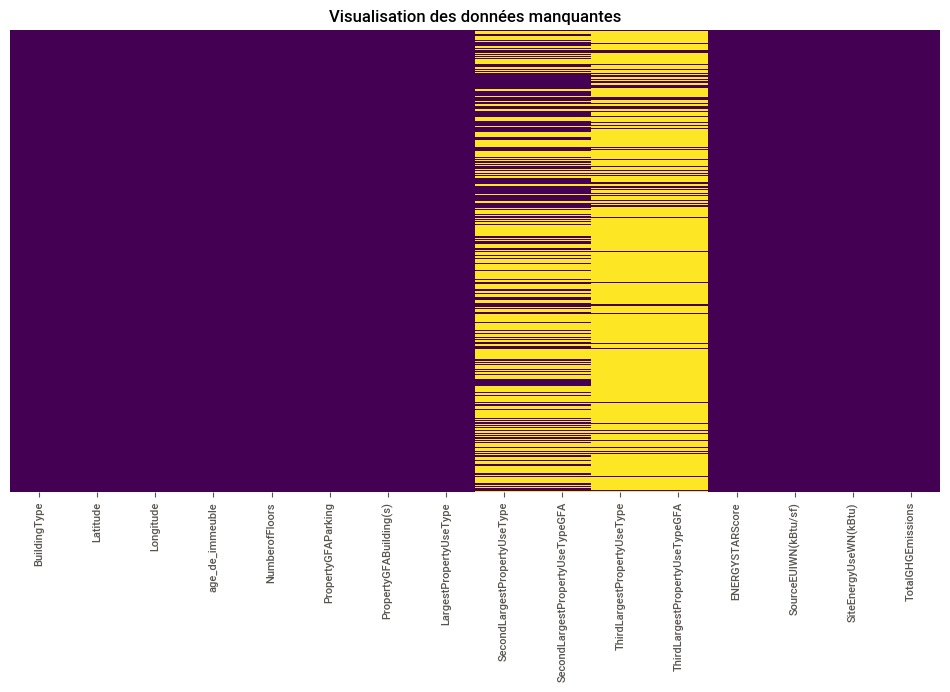

In [115]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()

# Afficher les résultats
print(missing_data)

# Optionnel: Afficher un résumé plus complet
print("\nRésumé des données manquantes :")
print(df.isnull().sum().sort_values(ascending=False))

# Optionnel: Afficher un graphique pour visualiser les données manquantes


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

# on transforme les nans dans SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA en 0 

In [116]:
df['SecondLargestPropertyUseTypeGFA'] = df['SecondLargestPropertyUseTypeGFA'].fillna(0)
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(0)

# on a pas l'information si les parking sont ouverts, fermés ou semi fermés alors on va pas les prendre en compte 

In [117]:
df_filtered = df[df['PropertyGFAParking'] != 0]
df_filtered

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions
1,NonResidential,47.61317,-122.33393,29,11,15064,88502,Hotel,Parking,15064.0,Restaurant,4622.000000,61.0,179.399994,8664479.00,295.86
2,NonResidential,47.61393,-122.33810,56,41,196718,759392,Hotel,NaN,0.0,NaN,0.000000,43.0,244.100006,73937112.00,2089.28
10,NonResidential,47.60695,-122.33414,56,11,19279,133884,Hotel,NaN,0.0,NaN,0.000000,30.0,233.000000,16646930.00,691.26
11,NonResidential,47.60713,-122.33323,27,25,61161,272015,Hotel,NaN,0.0,NaN,0.000000,36.0,199.399994,27070114.00,740.97
13,NonResidential,47.60809,-122.33212,45,33,57600,258352,Hotel,Parking,57600.0,NaN,0.000000,58.0,180.699997,22524948.00,648.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,NonResidential,47.59666,-122.31253,12,3,14989,47673,Office,NaN,0.0,NaN,0.000000,67.0,172.899994,2626698.25,20.10
3320,NonResidential,47.62146,-122.33976,11,12,163260,317442,Office,Parking,136594.0,NaN,0.000000,99.0,110.000000,12926544.00,147.14
3324,NonResidential,47.62263,-122.33976,10,12,166208,317189,Office,Parking,147597.0,NaN,0.000000,98.0,117.599998,14409447.00,202.12
3329,Nonresidential COS,47.62251,-122.33390,11,13,197659,339038,Office,Parking,202178.0,Retail Store,6313.200195,98.0,101.599998,14037166.00,245.16


In [118]:
df_filtered = df_filtered[(df_filtered["LargestPropertyUseType"] != "Parking") & (df_filtered["SecondLargestPropertyUseType"] !=  "Parking") & (df_filtered["ThirdLargestPropertyUseType"] !=  "Parking") & (df_filtered["ThirdLargestPropertyUseTypeGFA"] == 0)]
df_filtered

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions
2,NonResidential,47.613930,-122.33810,56,41,196718,759392,Hotel,NaN,0.0,NaN,0.0,43.0,244.100006,7.393711e+07,2089.28
10,NonResidential,47.606950,-122.33414,56,11,19279,133884,Hotel,NaN,0.0,NaN,0.0,30.0,233.000000,1.664693e+07,691.26
11,NonResidential,47.607130,-122.33323,27,25,61161,272015,Hotel,NaN,0.0,NaN,0.0,36.0,199.399994,2.707011e+07,740.97
27,NonResidential,47.617840,-122.32966,24,10,38281,133585,Hotel,NaN,0.0,NaN,0.0,57.0,180.600006,1.117141e+07,328.63
29,NonResidential,47.615580,-122.34186,47,5,16200,52210,Hotel,NaN,0.0,NaN,0.0,57.0,206.300003,4.557974e+06,128.44
43,NonResidential,47.609460,-122.33337,56,24,205970,126240,Hotel,NaN,0.0,NaN,0.0,67.0,121.800003,1.616319e+07,295.33
53,NonResidential,47.620010,-122.34274,25,7,34735,115718,Hotel,Restaurant,3000.0,NaN,0.0,84.0,129.800003,6.835264e+06,199.95
55,NonResidential,47.620230,-122.35951,27,6,36744,118858,Hotel,NaN,0.0,NaN,0.0,81.0,107.599998,6.849826e+06,152.76
115,NonResidential,47.650680,-122.36331,24,4,37500,102100,Residence Hall/Dormitory,NaN,0.0,NaN,0.0,89.0,74.699997,4.800620e+06,129.39
147,NonResidential,47.627820,-122.34045,27,7,54341,153315,Hotel,NaN,0.0,NaN,0.0,76.0,171.399994,1.175409e+07,338.16


In [119]:
df = df.drop(df_filtered.index)

In [120]:
df.shape

(868, 16)

# on supprime maintenant la colonne surface du parking : 

In [121]:
df = df.drop("PropertyGFAParking", axis=1)
df.shape 

(868, 15)

In [122]:
df 

,BuildingType,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,98,12,88434,Hotel,NaN,0.0,NaN,0.000000,60.0,189.000000,7456910.0,249.98
1,NonResidential,47.61317,-122.33393,29,11,88502,Hotel,Parking,15064.0,Restaurant,4622.000000,61.0,179.399994,8664479.0,295.86
3,NonResidential,47.61412,-122.33664,99,10,61320,Hotel,NaN,0.0,NaN,0.000000,56.0,224.000000,6946800.5,286.43
6,NonResidential,47.61390,-122.33283,99,11,83008,Hotel,NaN,0.0,NaN,0.000000,27.0,154.699997,6062767.5,176.14
8,NonResidential,47.60294,-122.33263,121,15,163984,Hotel,NaN,0.0,NaN,0.000000,43.0,187.199997,14194054.0,392.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,NonResidential,47.61665,-122.33261,10,14,144614,Hotel,NaN,0.0,NaN,0.000000,89.0,105.599998,5547964.5,50.32
3320,NonResidential,47.62146,-122.33976,11,12,317442,Office,Parking,136594.0,NaN,0.000000,99.0,110.000000,12926544.0,147.14
3324,NonResidential,47.62263,-122.33976,10,12,317189,Office,Parking,147597.0,NaN,0.000000,98.0,117.599998,14409447.0,202.12
3329,Nonresidential COS,47.62251,-122.33390,11,13,339038,Office,Parking,202178.0,Retail Store,6313.200195,98.0,101.599998,14037166.0,245.16


In [123]:
df.dtypes

BuildingType                        object
Latitude                           float64
Longitude                          float64
age_de_immeuble                      int64
NumberofFloors                       int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SourceEUIWN(kBtu/sf)               float64
SiteEnergyUseWN(kBtu)              float64
TotalGHGEmissions                  float64
dtype: object

# donc on a : 
    BuildingType 
    Neighborhood 
    LargestPropertyUseType 
    SecondLargestPropertyUseType 
    ThirdLargestPropertyUseType  qui sont des colonne object on va transformer avec onehot encoder et get-dummmies 

In [124]:
df.shape 

(868, 15)

In [125]:
categorical_columns = ['BuildingType', 'LargestPropertyUseType',
                       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']  

# Transformation des colonnes catégorielles en colonnes binaires
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Affichage du DataFrame transformé
df

,Latitude,Longitude,age_de_immeuble,NumberofFloors,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Entertainment/Public Assembly,SecondLargestPropertyUseType_Other - Recreation,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Other - Services,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Performing Arts,SecondLargestPropertyUseType_Pre-school/Daycare,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Bar/Nightclub,ThirdLargestPropertyUseType_Convenience Store without Gas Station,ThirdLargestPropertyUseType_Data Center,ThirdLargestPropertyUseType_Distribution Center,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym,ThirdLargestPropertyUseType_Food Service,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Other/Specialty Hospital,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Worship Facility
0,47.61220,-122.33799,98,12,88434,0.0,0.000000,60.0,189.000000,7456910.0,249.98,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Latitude                                              0
Longitude                                             0
age_de_immeuble                                       0
NumberofFloors                                        0
PropertyGFABuilding(s)                                0
                                                     ..
ThirdLargestPropertyUseType_Refrigerated Warehouse    0
ThirdLargestPropertyUseType_Restaurant                0
ThirdLargestPropertyUseType_Retail Store              0
ThirdLargestPropertyUseType_Social/Meeting Hall       0
ThirdLargestPropertyUseType_Worship Facility          0
Length: 91, dtype: int64

Résumé des données manquantes :
Latitude                                           0
ThirdLargestPropertyUseType_Food Service           0
ThirdLargestPropertyUseType_Financial Office       0
ThirdLargestPropertyUseType_Distribution Center    0
ThirdLargestPropertyUseType_Data Center            0
                                                  ..
LargestP

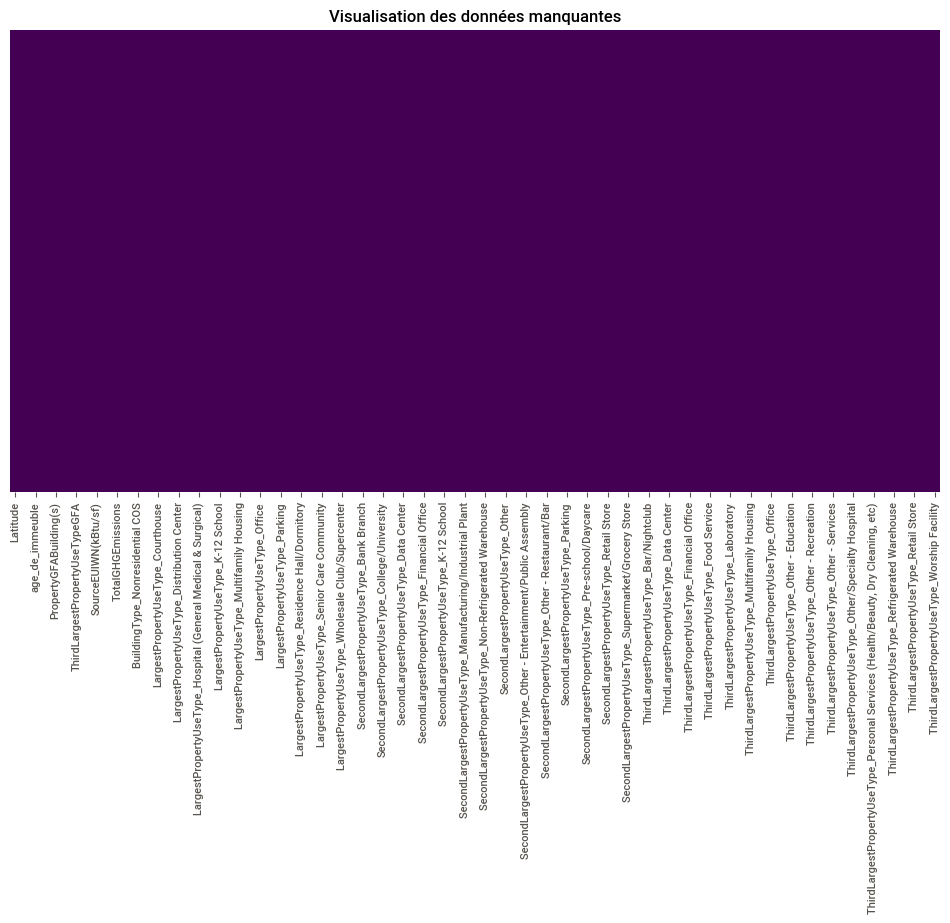

In [126]:
# Vérifier les données manquantes
missing_data = df.isnull().sum()

# Afficher les résultats
print(missing_data)

# Optionnel: Afficher un résumé plus complet
print("\nRésumé des données manquantes :")
print(df.isnull().sum().sort_values(ascending=False))

# Optionnel: Afficher un graphique pour visualiser les données manquantes


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

In [127]:
import sweetviz as sv
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [128]:
# Afficher le rapport dans un fichier HTML
report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [129]:
df.to_csv('machimachinelearning.csv', index=False)